In [ ]:
!pip install liac-arff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11732 sha256=e5bfff6c5d7d0d71672d891330f87ec97029426a1f9d39712b69b4c3abbbcab1
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
# Importation des bibliothèques nécessaires
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
import arff

In [ ]:
# Téléchargement du fichier OliveOil_TRAIN.arff depuis le site http://www.timeseriesclassification.com/
# et enregistrement sous le nom OliveOil.zip

urllib.request.urlretrieve("http://www.timeseriesclassification.com/Downloads/OliveOil.zip", "OliveOil.zip")

# Décompression du fichier OliveOil.zip
!unzip OliveOil.zip

Archive:  OliveOil.zip
  inflating: OliveOil.txt            
  inflating: OliveOil_TEST.arff      
  inflating: OliveOil_TEST.txt       
  inflating: OliveOil_TRAIN.arff     
  inflating: OliveOil_TRAIN.txt      
  inflating: OliveOil_TEST.ts        
  inflating: OliveOil_TRAIN.ts       


In [ ]:
# Chargement du fichier ARFF contenant les données d'entraînement
with open('OliveOil_TRAIN.arff') as f:
    dataset = arff.load(f)

# Extraction des données et des métadonnées
data = np.array(dataset['data'], dtype=np.float64)
meta = dataset['attributes']

# Séparation des données en features (X) et labels (y)
X = data[:,:-1]
y = data[:,-1]

In [ ]:
# Définition des différents classificateurs à tester
classifiers = [
    ("Naive Bayes", GaussianNB()),
    
    ("K-Nearest Neighbors (DEFAULT K=5)", KNeighborsClassifier()),
    ("K-Nearest Neighbors (K=3)", KNeighborsClassifier(3)),

    ("Linear Discriminant Analysis", LinearDiscriminantAnalysis()),

    ("Decision Tree", DecisionTreeClassifier()),
    ("Decision Tree (max_depth=4)", DecisionTreeClassifier(max_depth=4)),

    ("Artificial Neural Networks (DEFAULT: alpha=0.0001 max_iter=200) ", MLPClassifier()),
    ("Artificial Neural Networks (alpha=0.0000000001, max_iter=1000)", MLPClassifier(alpha=0.0000000001, max_iter=1000)),

    ("RBF SVM (DEFAULT gamma='scale', C=1)", SVC()),
    ("RBF SVM (gamma=15, C=4)", SVC(gamma=15, C=3)),

    ("Linear SVM (DEFAULT gamma='scale', C=1)", SVC(kernel="linear")),
    ("Linear SVM (gamma=15, C=25)", SVC(kernel="linear", gamma=15, C=25)),

    ("Poly SVM (DEFAULT gamma='scale', C=1)", SVC(kernel="poly")),
    ("Poly SVM (gamma=15, C=3)", SVC(kernel="poly", gamma=15, C=3)),

    ("Sigmoid SVM", SVC(kernel="sigmoid")),
    ("Gaussian Process", GaussianProcessClassifier(1.0 * RBF(1.0))),
    ("Random Forest", RandomForestClassifier(max_depth=5, n_estimators=10, max_features=570)),
    ("AdaBoost", AdaBoostClassifier()),
    ("QDA", QuadraticDiscriminantAnalysis())    
]

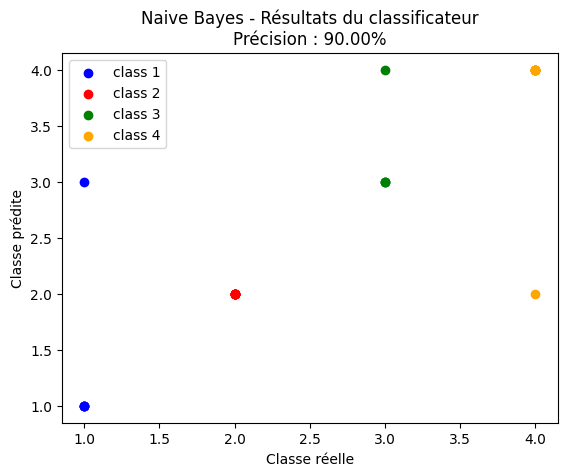

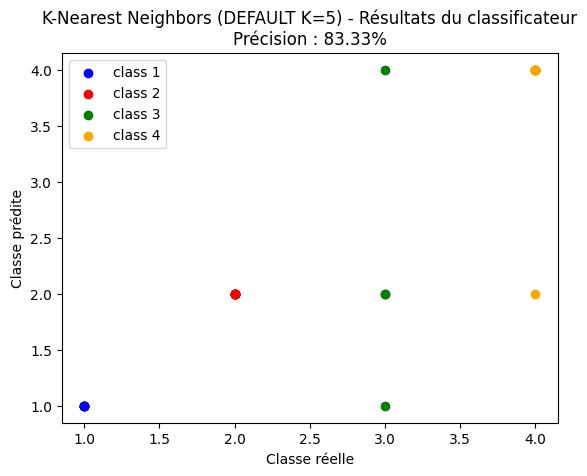

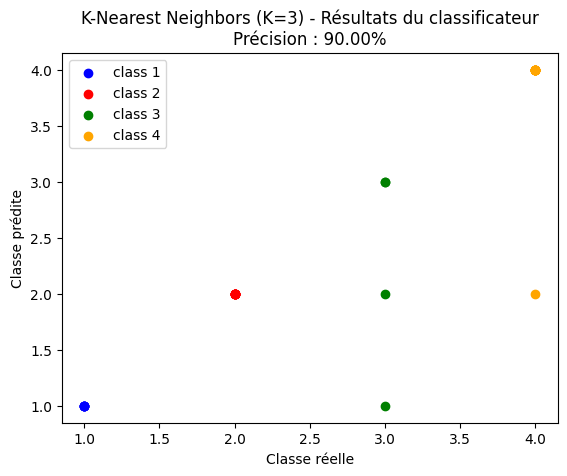

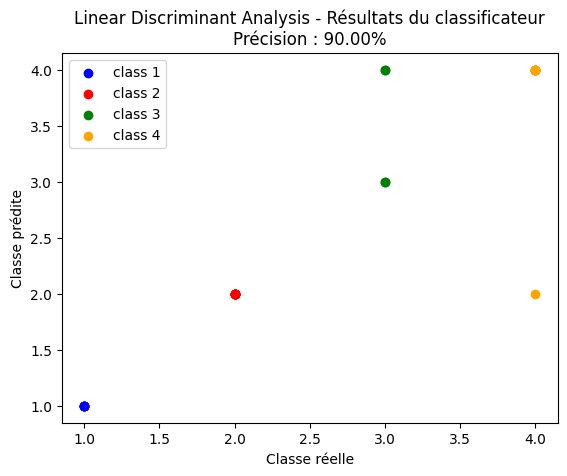

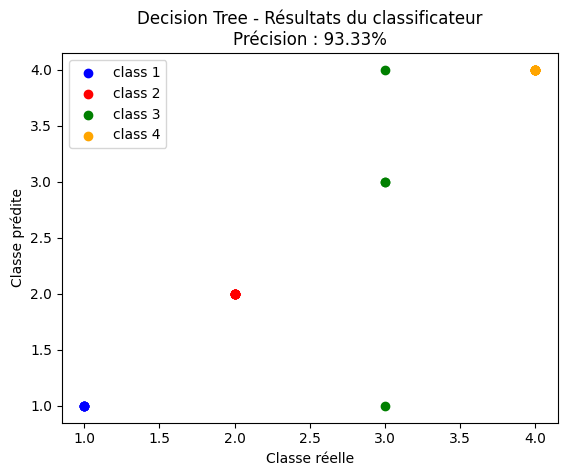

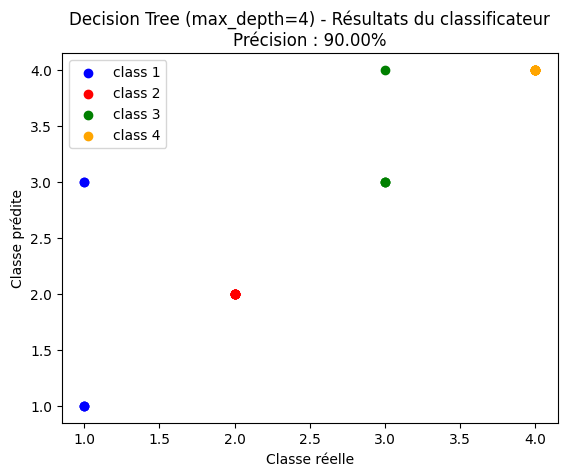

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


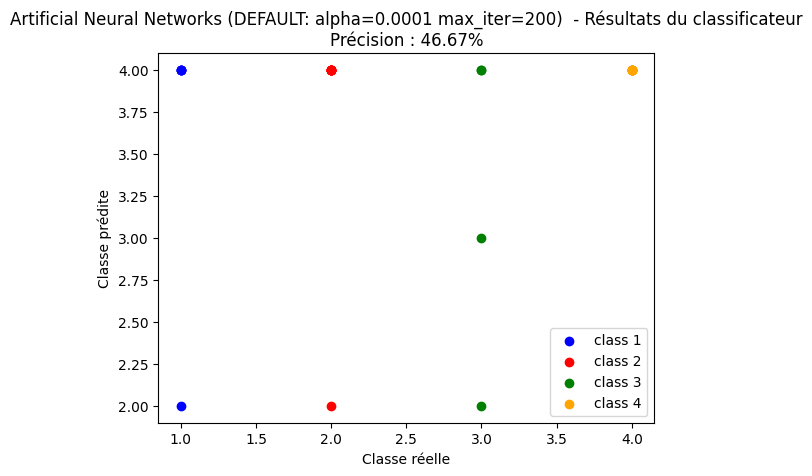

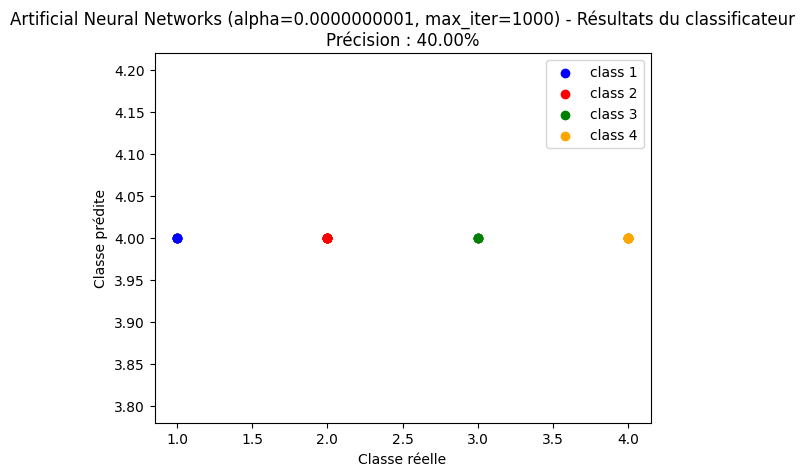

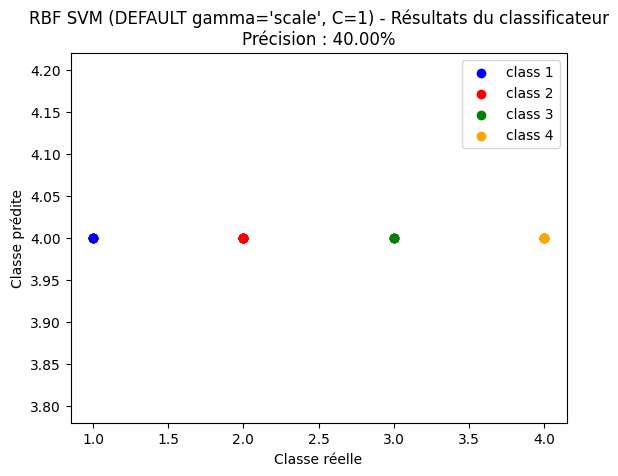

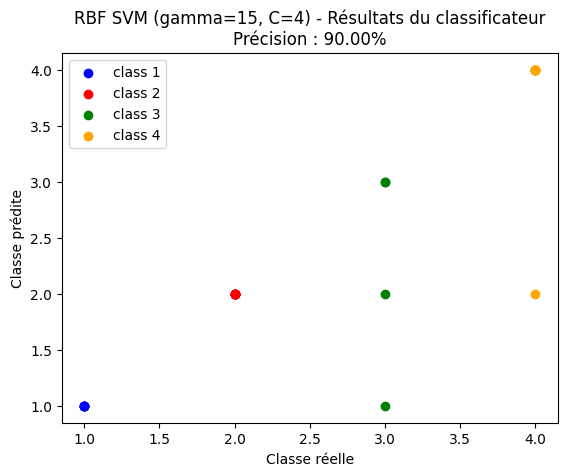

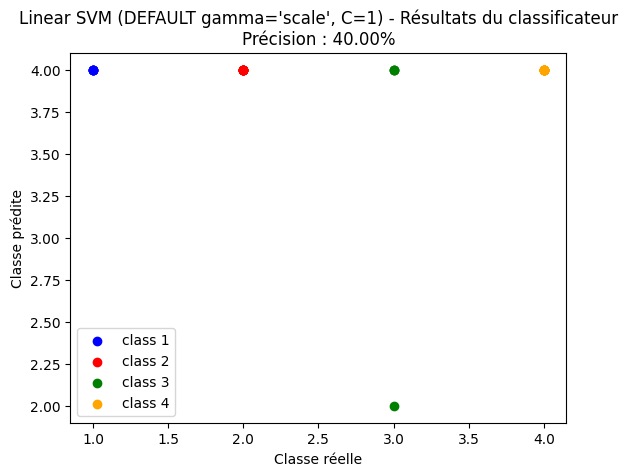

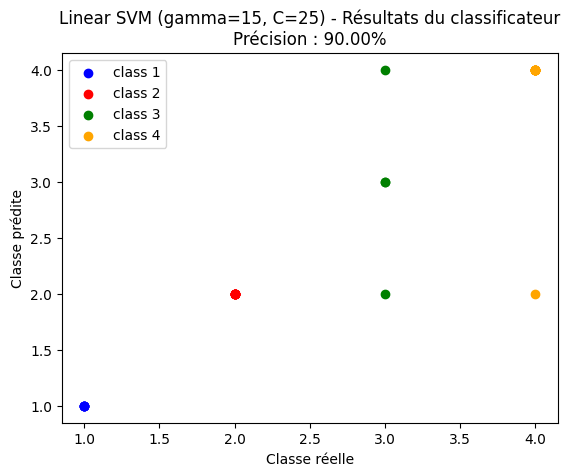

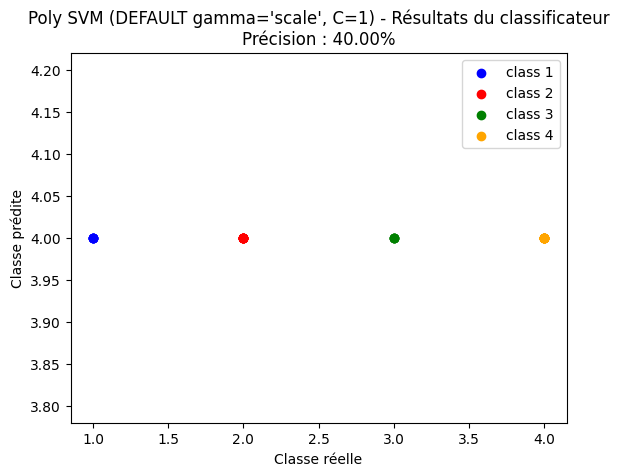

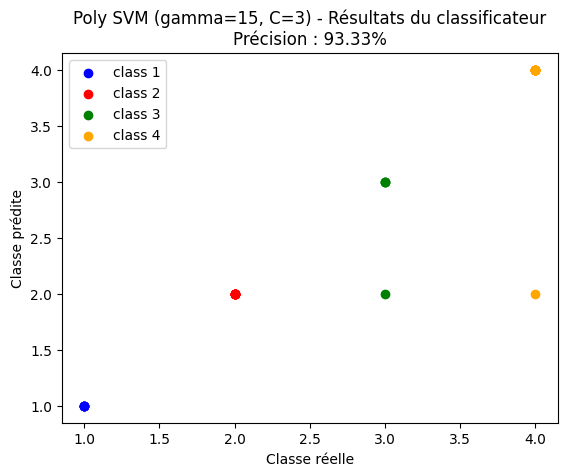

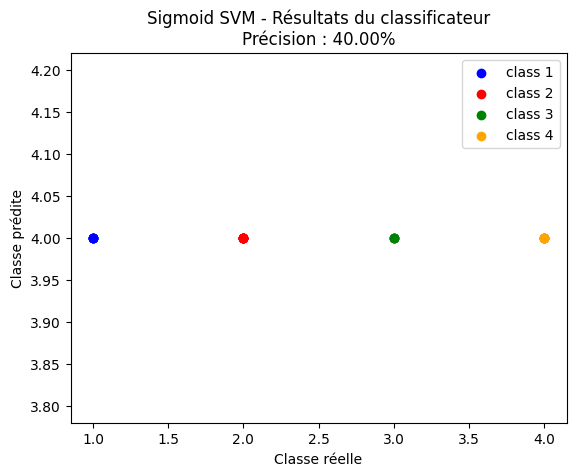

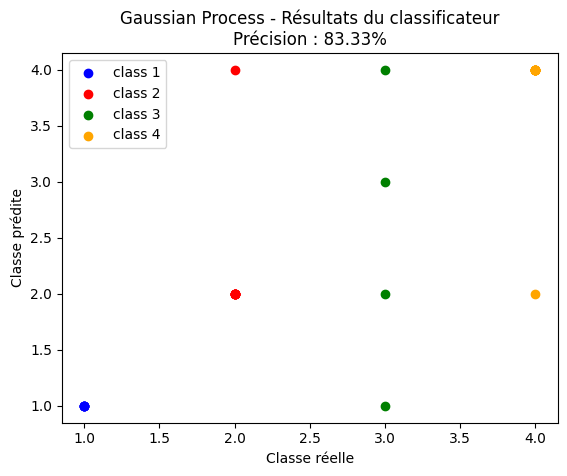

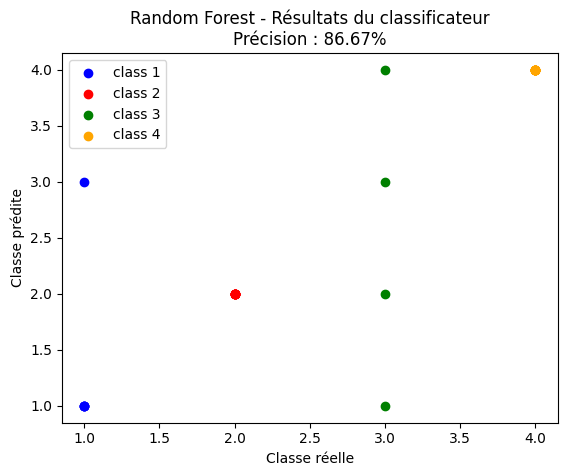

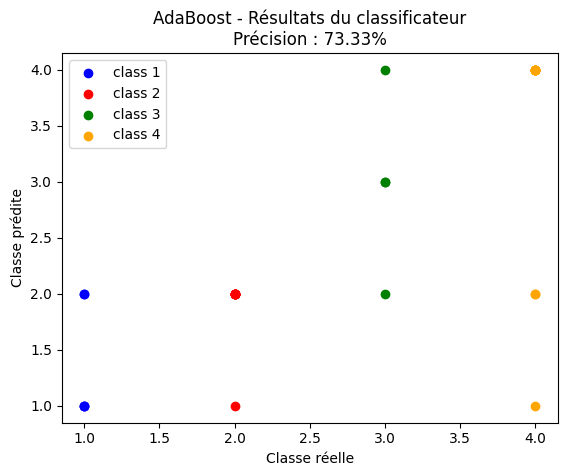

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


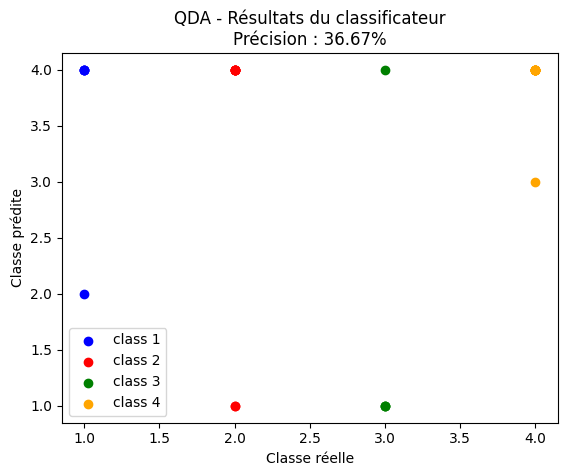

In [12]:

# Entrainement de chaque classificateur et affichage des résultats
max_accuracy = 0  # Initialisation de la variable contenant la précision maximale obtenue
for name, model in classifiers:
    model.fit(X, y)  # Entraînement du modèle avec les données d'entraînement
    
    # Chargement du fichier ARFF contenant les données de test pour l'évaluation des performances des classificateurs
    with open('OliveOil_TEST.arff') as f:
        test_data = arff.load(f)['data']
    X_test = np.array(test_data, dtype=np.float64)[:,:-1]
    y_test = np.array(test_data, dtype=np.float64)[:,-1]

    # Utilisation du modèle entraîné pour prédire les labels des données de test
    y_pred = model.predict(X_test)

    # Calcul de la précision du modèle
    accuracy = accuracy_score(y_test, y_pred)
   
    if accuracy > max_accuracy:
        max_accuracy = accuracy
    
    # Affichage d'un graphe montrant les labels prédits par rapport aux labels réels pour chaque classe
    colors = ['blue', 'red', 'green', 'orange']
    labels = ['class 1', 'class 2', 'class 3', 'class 4']
    for i in range(4):
        plt.scatter(y_test[y_test==i+1], y_pred[y_test==i+1], color=colors[i], label=labels[i])
    plt.xlabel("Classe réelle")
    plt.ylabel("Classe prédite")
    plt.title(name + " - Résultats du classificateur\nPrécision : {:.2f}%".format(accuracy * 100))
    plt.legend()
    plt.show()
    
